The datasets used in the notebook can be found here - https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

## **Demo using the Iris Dataset**

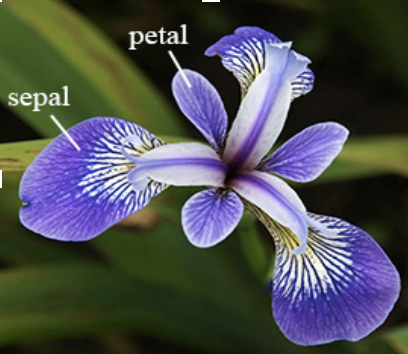

1. Import iris dataset and store as a dataframe. Print dataframe.


In [ ]:
import pandas as pd


pd.set_option('display.max_columns', None)

irisDf = pd.read_csv('iris.csv')

2. Create feature matrix and response vector: X, y


In [ ]:
X = irisDf[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
y = irisDf['Species']

3. Partition the X and y into train and test partitions  - 70/30. Use a random state of 2020 and use the stratify option.

Do you know why stratify is used? What is the use of the random state parameter?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

4. Build a decision tree classifer using the training data. Use entropy as the criterion. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

5. Predict the species using the test partition

In [ ]:
y_pred = dt.predict(X_test)

6. Plot the confusion matrix. Also print the accuracy of your model on the test data.


[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
Accuracy = 0.9777777777777777


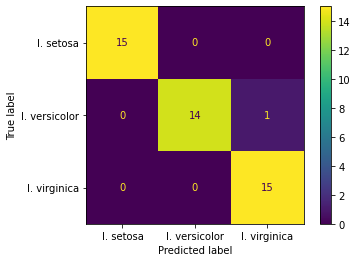

In [ ]:
from sklearn import metrics

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

7. Display the decision tree


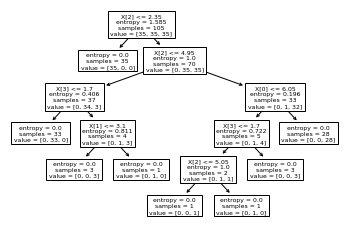

In [ ]:
from sklearn import tree

plt.figure(2)
irisTree = tree.plot_tree(dt)
plt.show()

8. Format the tree to be more descriptive. Save the decision tree as an image.


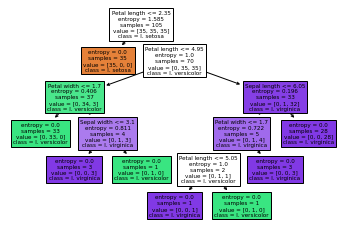

In [ ]:
from sklearn import tree

plt.figure(2)
fn = X.columns
cn = y.unique()
irisTree = tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.savefig('IrisDT.png')
plt.show()

9. Display the important features

In [ ]:
# Feature Importance

print('Feature Importance:', dt.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
print(imp)

Feature Importance: [0.01715748 0.01949941 0.88291052 0.0804326 ]
              0         1
0  Sepal length  0.017157
1   Sepal width  0.019499
2  Petal length  0.882911
3   Petal width  0.080433


## Exercise

Load the UniversalBank.csv. The data set provides information about many people and our goal is to build a model to classify the cases into those who will accept the offer of a personal loan and those who will reject it. In the data, a zero in the Personal loan column indicates that the concerned person rejected the offer and a one indicates that the person accepted the offer. 

Answer the following questions:

A. What is the target variable?

B. Ignore the variables Row and Zip code and build a CART model. Split data into target & feature variables

C. Partition the data 70/30. Random_state = 2020, stratify=y 

D. How many of the cases in the training partition represented people who accepted offer of a personal loan?

E. Plot the classification tree Use entropy criterion. Max_depth = 5, random_state = 2020.

F. On the training partition, how many acceptors did the model classify as non-acceptors? (hint: use the confusion matrix)

G. On the training partition, how many non-acceptors did the model classify as acceptors?

H. What was the accuracy on the training partition? 

I. What was the accuracy on the test partition? 

In [ ]:
# Type solution here

### Solution

Acceptors 336


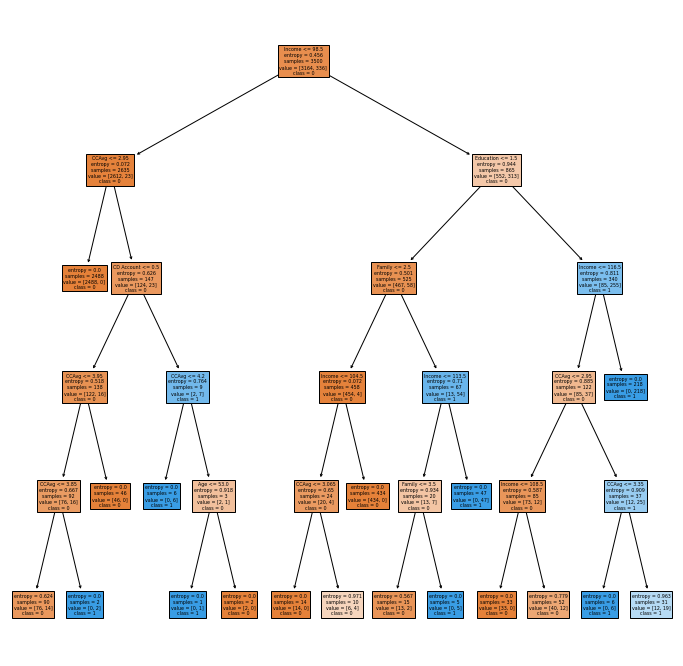

Accuracy on Training partition: 0.9874285714285714
Accuracy on Testing partition: 0.99


In [ ]:
# Solution -- Please attempt the question on your own before looking at the solution.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import tree

#read in csv
df=pd.read_csv('UniversalBank.csv')
pd.set_option('display.max_columns', 500)

# A.	What is the target variable? - Personal Loan
# print or comment

# B.	Ignore the variables Row and Zip code and build a CART model.
df.drop(df.columns[0],axis=1,inplace=True)

feature_cols=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']

#split into target & feature variables
x=df[feature_cols]
y=df['Personal Loan']

# C.	Partition the data 70/30. random_State = 2020.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 2020, stratify=y)

# D.	How many of the cases in the training partition represented people who accepted
# offer of a personal loan?
# Print or comment
# many ways to answer this question
print("Acceptors", np.sum(yTrain))

# E.	Plot the classification tree.
#instantiate a DT
dt = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=2020)
dt.fit(xTrain,yTrain)
ypred = dt.predict((xTest))

fn = x.columns

plt.figure(figsize=(12,12))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

# F.	On the training partition, how many acceptors did the model classify as non-acceptors? 
cnf_matrix=metrics.confusion_matrix(yTest,ypred)
# you can also plot the confusion matrix for a clear understanding
# answer based on confusion matrix result

# G.	On the training partition, how many non-acceptors did the model classify as acceptors?
# you can also plot the confusion matrix for a clear understanding
# answer based on confusion matrix result

# H.	What was the accuracy on the training partition?
# Slightly different numbers are acceptable
training_pred = dt.predict(xTrain)
acc_training = accuracy_score(training_pred, yTrain)
print("Accuracy on Training partition:",acc_training)

# I.	What was the accuracy on the test partition?
# Slightly different numbers are acceptable
acc_testing = accuracy_score(ypred, yTest)
print("Accuracy on Testing partition:",acc_testing)